## Analysing Power Play Batting of Teams in IPL 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
powerplay_batting = pd.read_csv("project_ipl_2022_powerplay_batting.csv")

In [3]:
powerplay_batting.head()

,Teams,Team_shortform,Runs Scored,Balls Faced,Outs,4's Hitted,6's Hitted,Average,Strike Rate,BPW,BP4,BP6,BPB,Boundary %
0,Chennai Super Kings,CSK,588,504,23,65,25,25.57,116.67,21.91,7.75,20.16,5.60,17.9%
1,Delhi Capitals,DC,723,504,23,99,26,31.43,143.45,21.91,5.09,19.38,4.03,24.8%
2,Gujarat Titans,GT,674,576,21,99,12,32.10,117.01,27.43,5.82,48.00,5.19,19.3%
3,Kolkata Knight Riders,KKR,575,504,27,69,19,21.30,114.09,18.67,7.30,26.53,5.73,17.5%
4,Lucknow Super Giants,LSG,628,540,25,69,24,25.12,116.30,21.60,7.83,22.50,5.81,17.2%


In [4]:
colors = []
# Iterate over rows of top_5_strike_rate_players_in_pp
for idx, row in powerplay_batting.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('blue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['yellow', 'blue', 'mediumpurple', 'purple', 'skyblue', 'blue', 'red', 'deeppink', 'green', 'orange', 'grey']


## Finding Which team has more Avearge Runs Per Wicket in IPL 2022 Powerplay phase(0-6 Overs)

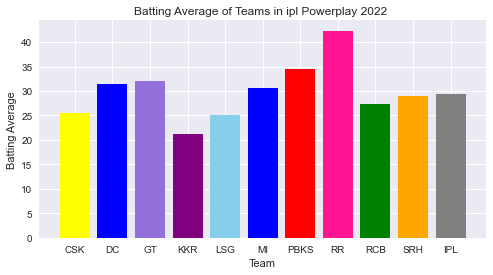

In [5]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batting["Team_shortform"]
y = powerplay_batting["Average"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Average of Teams in ipl Powerplay 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.show()

From the above bar graph we can see that RR has totally Outperformed others teams in powerplay giving there importance 
to wicket and lossing a wicket for 43 runs and whereas KKR and CSK has lossing wickets for just below 25 runs.

## Finding Which team has batted Aggersively(Highest Strike Rate) in IPL 2022 Powerplay phase(0-6 Overs)

strike rate = runs for 100 balls

Run Per Ball = Runs/balls

Strike Rate = Runs per ball * 100

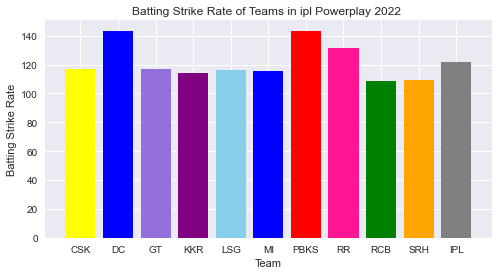

In [6]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batting["Team_shortform"]
y = powerplay_batting["Strike Rate"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Strike Rate of Teams in ipl Powerplay 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Strike Rate")
plt.show()

Only 3 Teams has performed well in attracting in powerplay than average of all teams strike rate we can see than DC and 
PBKS has nearly 142 strike rate and RR Has Strike rate of 135 and We can see that RCB and SRH has less strike rate in
powerplay than all other teams

## Finding Which team has taking less balls to hit a boundary in IPL 2022 Powerplay phase(0-6 Overs)

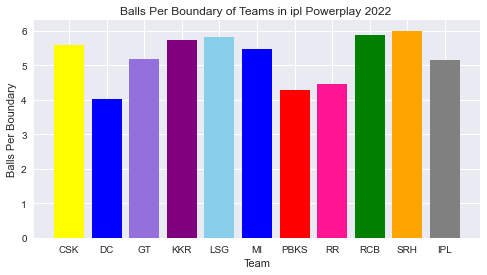

In [7]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batting["Team_shortform"]
y = powerplay_batting["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of Teams in ipl Powerplay 2022 ")
plt.xlabel("Team")
plt.ylabel("Balls Per Boundary")
plt.show()

From above bar graph we can say that DC,PBKS, RR are taking less balls to hit a boundary for just nearly 4 balls to hit 
boundary this due to the batting P Shaw , D Warner for DC, and J Baristow, S Dhawan for PBKS, J Buttler,Y Jasiwal for there teams whereas SRH,RCB,CSK are finding difficult to hit a boundaries in powerplay due failure of top order players such as 
willamson for SRH,Du plessis For RCB , Gaikwad For Csk has failed to deliver in ipl 2022

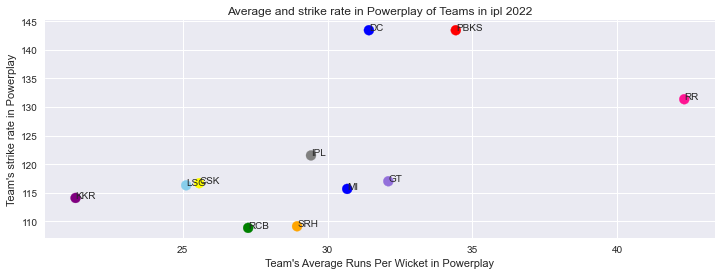

In [8]:
# create scatter plot for Teams Average and strikerate in powerplay batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = powerplay_batting["Average"]
y = powerplay_batting["Strike Rate"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Average and strike rate in Powerplay of Teams in ipl 2022")
plt.xlabel("Team's Average Runs Per Wicket in Powerplay")
plt.ylabel("Team's strike rate in Powerplay")
for i, label in enumerate(powerplay_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

From the above scatter we can see that RR,PBKS,DC has really well scoring well in powerplay with strike rate more than
135 and other teams are really struggling to play in powerplay batting especially KKR,RCB,SRH has really performed badly 
in ipl

## K-Means Clustering on Teams Batting in powerplay 

In [9]:
X = powerplay_batting.iloc[:, [7,8]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


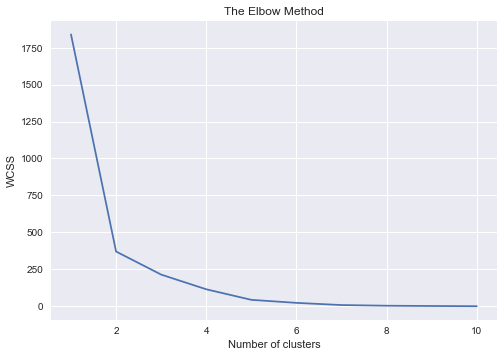

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

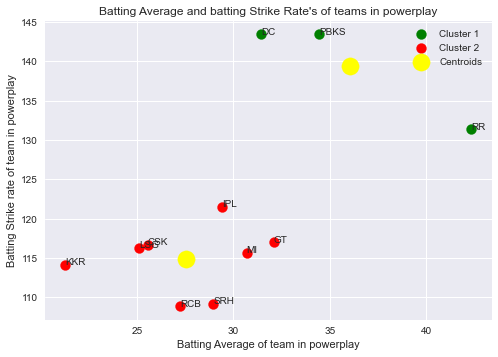

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightblue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Average and batting Strike Rate's of teams in powerplay")
plt.xlabel("Batting Average of team in powerplay")
plt.ylabel('Batting Strike rate of team in powerplay')
for i, label in enumerate(powerplay_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

In [13]:
kmeans.labels_ 

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [14]:
powerplay_batting['Cluster_on_avg_str'] = kmeans.labels_

In [15]:
cluster_1_teams = powerplay_batting[powerplay_batting['Cluster_on_avg_str'] == 0]

In [16]:
cluster_1_teams.head(4)

,Teams,Team_shortform,Runs Scored,Balls Faced,Outs,4's Hitted,6's Hitted,Average,Strike Rate,BPW,BP4,BP6,BPB,Boundary %,Cluster_on_avg_str
1,Delhi Capitals,DC,723,504,23,99,26,31.43,143.45,21.91,5.09,19.38,4.03,24.8%,0
6,Punjab Kings,PBKS,723,504,21,86,32,34.43,143.45,24.00,5.86,15.75,4.27,23.4%,0
7,Rajasthan Royals,RR,804,612,19,100,37,42.32,131.37,32.21,6.12,16.54,4.47,22.4%,0


We can see that DC,PBKS,RR Really Performing Well in powerplay batting so that clustering algorithm has clustered them in
one group

In [17]:
cluster_2_teams = powerplay_batting[powerplay_batting['Cluster_on_avg_str'] == 1]

In [18]:
cluster_2_teams.head(10)

,Teams,Team_shortform,Runs Scored,Balls Faced,Outs,4's Hitted,6's Hitted,Average,Strike Rate,BPW,BP4,BP6,BPB,Boundary %,Cluster_on_avg_str
0,Chennai Super Kings,CSK,588,504,23,65,25,25.57,116.67,21.91,7.75,20.16,5.60,17.9%,1
2,Gujarat Titans,GT,674,576,21,99,12,32.10,117.01,27.43,5.82,48.00,5.19,19.3%,1
3,Kolkata Knight Riders,KKR,575,504,27,69,19,21.30,114.09,18.67,7.30,26.53,5.73,17.5%,1
4,Lucknow Super Giants,LSG,628,540,25,69,24,25.12,116.30,21.60,7.83,22.50,5.81,17.2%,1
5,Mumbai Indians,MI,583,504,19,72,20,30.68,115.67,26.53,7.00,25.20,5.48,18.3%,1
8,Royal Challengers Bangalore,RCB,627,576,23,83,15,27.26,108.85,25.04,6.94,38.40,5.88,17.0%,1
9,Sunrisers Hyderabad,SRH,550,504,19,70,14,28.95,109.13,26.53,7.20,36.00,6.00,16.7%,1
10,IPL,IPL,6475,5328,220,812,224,29.43,121.53,24.22,6.56,23.79,5.14,19.4%,1


through these teams are not doing well in power play one team Gujarat Titans are playing safe by giving more important to 
there wicket whers as kkr is not giving important to wicket and also not scoring much

## Clustering Of Players in IPL PowerPlay Batting 2022

By Seeing Players Performance in particular phases helps us that by which players that team has performed well/worst 
in that particular phase and if he is not form we can release him before auction or if is in form we can tell player 
he is doing something wrong in that particular phase which costing the team so that he can improve that and perform well 
next year

In [19]:
powerplay_batters = pd.read_csv("project_ipl_2022_powerplay_players_batting.csv")

In [20]:
powerplay_batters.head()

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BP4,BPB,Boundary %
0,Abhishek Sharma,SRH,14,255,203,6,42.5,125.62,46,39,3,0,0,33.83,5.21,4.83,20.7%
1,AM Rahane,KKR,7,92,95,4,23.0,96.84,27,10,3,0,0,23.75,9.50,7.31,13.7%
2,Anuj Rawat,RCB,8,77,83,5,15.4,92.77,22,8,3,0,0,16.60,10.38,7.55,13.3%
3,D Padikkal,RR,9,100,97,5,20.0,103.09,25,14,2,0,0,19.40,6.93,6.06,16.5%
4,DA Warner,DC,12,225,146,5,45.0,154.11,38,32,8,0,0,29.20,4.56,3.65,27.4%


In [21]:
colors = []
# Iterate over rows of powerplay_batters
for idx, row in powerplay_batters.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('blue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['orange', 'purple', 'green', 'deeppink', 'blue', 'skyblue', 'yellow', 'green', 'mediumpurple', 'blue', 'deeppink', 'red', 'skyblue', 'orange', 'red', 'yellow', 'blue', 'mediumpurple', 'purple', 'blue', 'skyblue', 'orange', 'yellow', 'blue', 'green', 'yellow', 'red', 'mediumpurple', 'purple', 'deeppink', 'green', 'purple', 'mediumpurple', 'deeppink']


## Player's Average Runs per wicket in Powerplay Batting in IPL 2022(with min 50 balls faced)

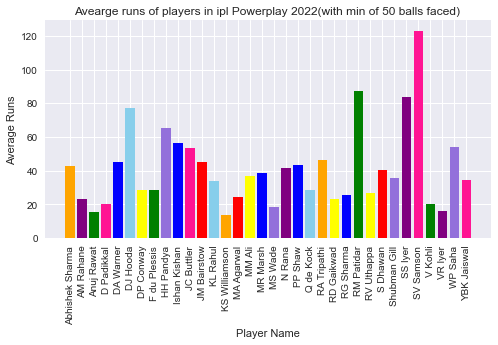

In [22]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batters["Player"]
y = powerplay_batters["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Avearge runs of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name")
plt.ylabel("Average Runs")
plt.xticks(rotation=90)
plt.show()

## Player's Strike Rate in Powerplay Batting in ipl 2022 (with min 50 balls faced)

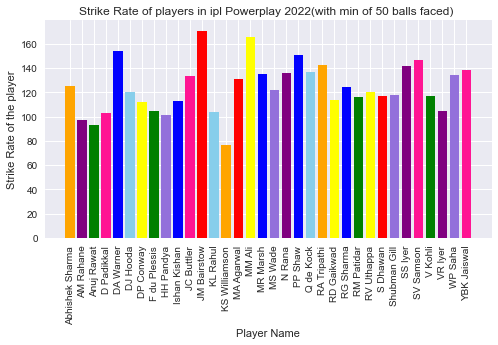

In [23]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batters["Player"]
y = powerplay_batters["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.show()

## Player's Balls Per Boundary in ipl powerplay batting 2022 (with min 50 balls faced)

Boundaries are really important in Powerplay to win the matches and to score fastly using filed restrictions for teams 
batting

Balls Per Boundary = How many balls will the batter will take to hit a boundary 

Lesser the value more is the boundary % of the player

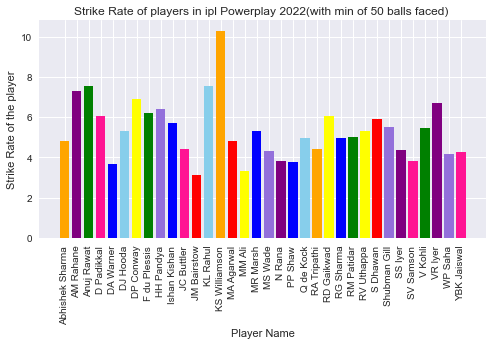

In [24]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = powerplay_batters["Player"]
y = powerplay_batters["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.show()

For above graph we can see that J Baristow , D Warner, M Ali, P Shaw, S Samson have high boundary % in powerplay which will 
teams to score runs more in the powerplay.

Whereas Williamson, Anuj Rawat, KL Rahul,A Rahane, V iyer have low boundary % in powerplay which will not help teams to score
runs more in the powerplay.

## Players Average And Strike Rate in Power play Batting in ipl 2022( with 50 balls faced)

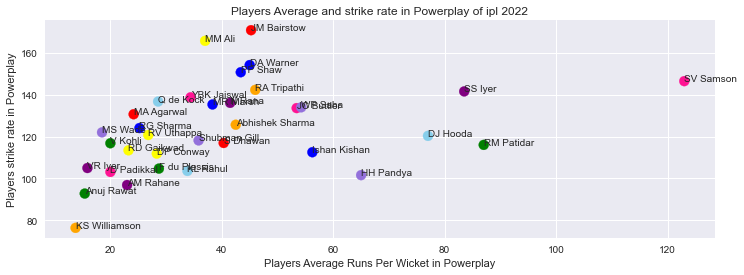

In [25]:
# create scatter plot for Players Average and strikerate in powerplay batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = powerplay_batters["Avg"]
y = powerplay_batters["SR"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Players Average and strike rate in Powerplay of ipl 2022")
plt.xlabel("Players Average Runs Per Wicket in Powerplay")
plt.ylabel("Players strike rate in Powerplay")
for i, label in enumerate(powerplay_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

From above Scatter plot we can see J Bairstow,D warner, SS Iyer, S Samson has performed well and Williamson , Anuj Rawat,
Rahane has performed badly but we will cluster the players into different clusters like good performed players, average 
performed players,and bad performed players.

## Clustering The players in powerplay batting IPL 2022 (with min 50 balls faced )

## K-Means Clustering on Players Batting in powerplay IPL 2022

In [26]:
X = powerplay_batters.iloc[:, [6,7]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


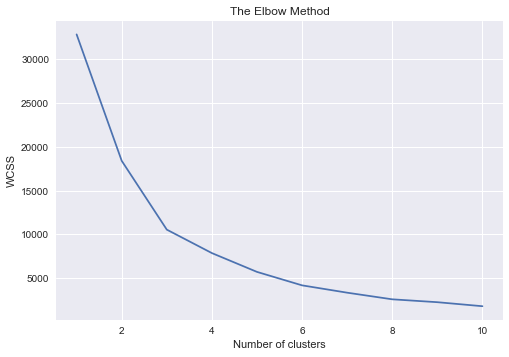

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

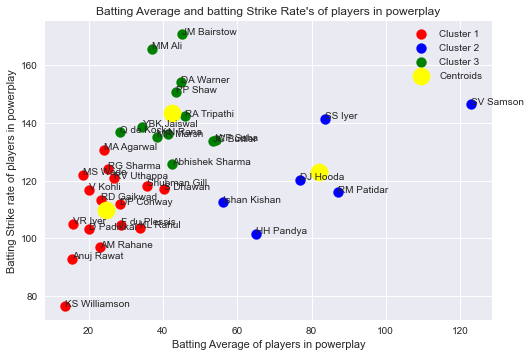

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Average and batting Strike Rate's of players in powerplay")
plt.xlabel("Batting Average of players in powerplay")
plt.ylabel('Batting Strike rate of players in powerplay')
for i, label in enumerate(powerplay_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

Cluster 1 (Green Color) = These Players has performed really good in powerplay batting with high str (which is required) 
and good 

Cluster 2 (blue Color) = These Players has performed well but with moderate str (which is ok) and with high avg

Cluster 3 (Red Color) = These Players has not performed with both str and avg is less ( Which will cost the team) 

In [30]:
kmeans.labels_ 

array([2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2])

In [31]:
powerplay_batters['Cluster_on_avg_str'] = kmeans.labels_

In [32]:
# These Players have not performed well in powerplay batting this year with less avg and less str
cluster_1_teams = powerplay_batters[powerplay_batters['Cluster_on_avg_str'] == 0]

In [33]:
cluster_1_teams.head(30)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BP4,BPB,Boundary %,Cluster_on_avg_str
1,AM Rahane,KKR,7,92,95,4,23.00,96.84,27,10,3,0,0,23.75,9.50,7.31,13.7%,0
2,Anuj Rawat,RCB,8,77,83,5,15.40,92.77,22,8,3,0,0,16.60,10.38,7.55,13.3%,0
3,D Padikkal,RR,9,100,97,5,20.00,103.09,25,14,2,0,0,19.40,6.93,6.06,16.5%,0
6,DP Conway,CSK,7,85,76,3,28.33,111.84,29,7,4,0,0,25.33,10.86,6.91,14.5%,0
7,F du Plessis,RCB,16,201,192,7,28.71,104.69,35,28,3,0,0,27.43,6.86,6.19,16.1%,0
12,KL Rahul,LSG,14,203,196,6,33.83,103.57,27,18,8,0,0,32.67,10.89,7.54,13.3%,0
13,KS Williamson,SRH,11,110,144,8,13.75,76.39,18,11,3,0,0,18.00,13.09,10.29,9.7%,0
14,MA Agarwal,PBKS,8,145,111,6,24.17,130.63,38,18,5,0,0,18.50,6.17,4.83,20.7%,0
17,MS Wade,GT,9,111,91,6,18.50,121.98,27,19,2,0,0,15.17,4.79,4.33,23.1%,0
22,RD Gaikwad,CSK,14,186,164,8,23.25,113.41,30,20,7,0,0,20.50,8.20,6.07,16.5%,0


In [34]:
# These Players have performed well in powerplay batting this year with very high avg and with ok str
cluster_2_teams = powerplay_batters[powerplay_batters['Cluster_on_avg_str'] == 1]

In [35]:
cluster_2_teams.head(20)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BP4,BPB,Boundary %,Cluster_on_avg_str
5,DJ Hooda,LSG,9,77,64,0,77.00,120.31,22,11,1,0,0,64.0,5.82,5.33,18.8%,1
8,HH Pandya,GT,8,65,64,0,65.00,101.56,21,10,0,0,0,64.0,6.40,6.40,15.6%,1
9,Ishan Kishan,MI,14,225,200,4,56.25,112.50,31,30,5,0,0,50.0,6.67,5.71,17.5%,1
24,RM Patidar,RCB,6,87,75,0,87.00,116.00,33,13,2,0,0,75.0,5.77,5.00,20.0%,1
28,SS Iyer,KKR,11,167,118,2,83.50,141.53,33,25,2,0,0,59.0,4.72,4.37,22.9%,1
29,SV Samson,RR,11,123,84,0,123.00,146.43,30,17,5,0,0,84.0,4.94,3.82,26.2%,1


In [36]:
# These Players have performed well in powerplay batting this year with high avg and with high str(Which is required)
cluster_3_teams = powerplay_batters[powerplay_batters['Cluster_on_avg_str'] == 2]

In [37]:
cluster_3_teams.head(20)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BP4,BPB,Boundary %,Cluster_on_avg_str
0,Abhishek Sharma,SRH,14,255,203,6,42.50,125.62,46,39,3,0,0,33.83,5.21,4.83,20.7%,2
4,DA Warner,DC,12,225,146,5,45.00,154.11,38,32,8,0,0,29.20,4.56,3.65,27.4%,2
10,JC Buttler,RR,17,374,280,7,53.43,133.57,54,43,20,1,0,40.00,6.51,4.44,22.5%,2
11,JM Bairstow,PBKS,9,181,106,4,45.25,170.75,59,25,9,1,0,26.50,4.24,3.12,32.1%,2
15,MM Ali,CSK,8,111,67,3,37.00,165.67,59,13,7,1,0,22.33,5.15,3.35,29.9%,2
16,MR Marsh,DC,8,115,85,3,38.33,135.29,31,8,8,0,0,28.33,10.63,5.31,18.8%,2
18,N Rana,KKR,9,83,61,2,41.50,136.07,39,12,4,0,0,30.50,5.08,3.81,26.2%,2
19,PP Shaw,DC,10,217,144,5,43.40,150.69,47,31,7,0,0,28.80,4.65,3.79,26.4%,2
20,Q de Kock,LSG,15,257,188,9,28.56,136.70,44,26,12,0,0,20.89,7.23,4.95,20.2%,2
21,RA Tripathi,SRH,11,138,97,3,46.00,142.27,24,16,6,0,0,32.33,6.06,4.41,22.7%,2


## Players in powerplay in all T20 Format( From last 1 year) 

In [38]:
players = pd.read_csv("project_other_powerplay_players_batting.csv")

In [39]:
players.head()

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BP4,BPB,normalized avg,normalized str,normalized bpb,normalized matches,Total Score
0,JM Bairstow,21,492,301,6,82.00,163.46,59,55,29,1,0,50.17,5.47,3.58,1.000,0.792,0.942,0.000,80.53
1,AD Hales,73,"1,612",944,42,38.38,170.76,74,218,68,3,0,22.48,4.33,3.30,0.326,0.884,1.000,1.000,75.16
2,FH Allen,47,"1,015",564,32,31.72,179.96,66,108,54,5,0,17.63,5.22,3.48,0.223,1.000,0.963,0.500,70.96
3,WG Jacks,48,"1,019",592,28,36.39,172.13,55,125,54,3,0,21.14,4.74,3.31,0.296,0.901,0.999,0.519,70.09
4,LS Livingstone,38,686,435,14,49.00,157.70,54,55,50,1,0,31.07,7.91,4.14,0.490,0.720,0.826,0.327,63.30


## Players Average Runs Per Wicket in Power Play From last 1 year in all T20 Formats (with min of 200 balls faced)

In [1]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = players["Player"]
y = players["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Avearge runs of players in Powerplay 2022(with min of 200 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Average Runs")
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

## Player's Strike Rate in Powerplay Batting in from past 1 year (with min 50 balls faced)

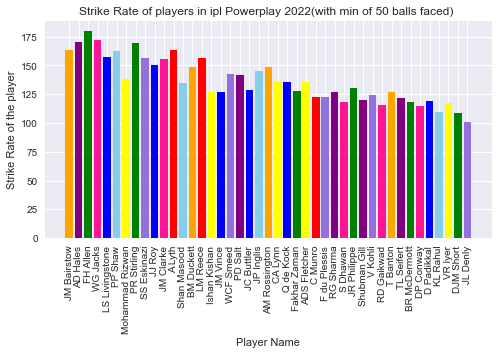

In [41]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = players["Player"]
y = players["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.show()

## Player's Balls Per Boundary in powerplay batting 2022  (with min 200 balls faced)

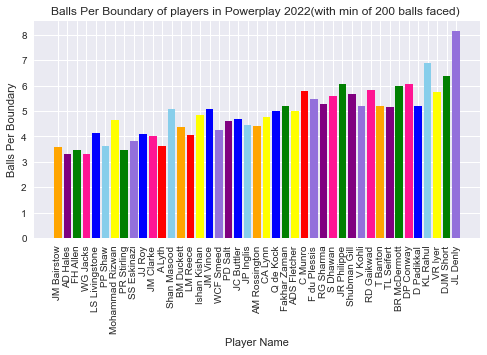

In [42]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = players["Player"]
y = players["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of players in Powerplay 2022(with min of 200 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Balls Per Boundary")
plt.xticks(rotation=90)
plt.show()

## Players Average And Strike Rate in Power play Batting in all T20's( with min 200 balls faced in powerplay)

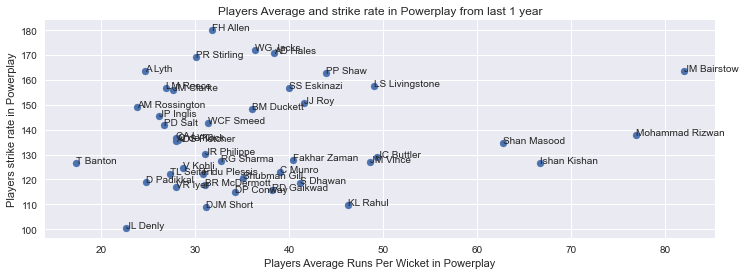

In [43]:
# create scatter plot for Players Average and strikerate in powerplay batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = players["Avg"]
y = players["SR"]
plt.scatter(x,y)
plt.title("Players Average and strike rate in Powerplay from last 1 year")
plt.xlabel("Players Average Runs Per Wicket in Powerplay")
plt.ylabel("Players strike rate in Powerplay")
for i, label in enumerate(players['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

In [67]:
X = players.iloc[:, [19,6]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


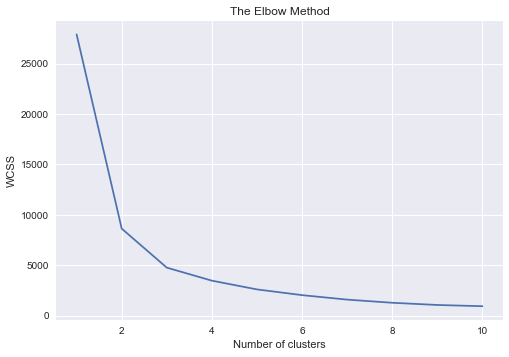

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

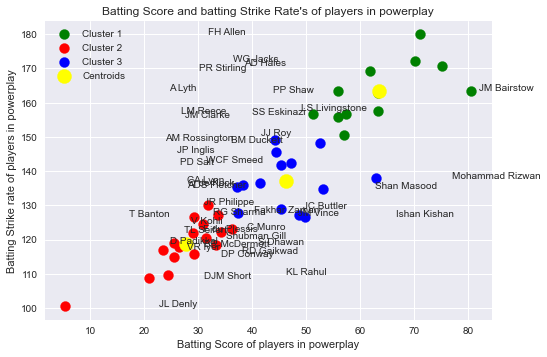

In [82]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title("Batting Score and batting Strike Rate's of players in powerplay")
plt.xlabel("Batting Score of players in powerplay")
plt.ylabel('Batting Strike rate of players in powerplay')
for i, label in enumerate(players['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

Cluster 1 (Green Color) = These Players has performed really good in powerplay batting with high str (which is required) 
and good 

Cluster 2 (blue Color) = These Players has performed well but with moderate str (which is ok) and with high avg

Cluster 3 (Red Color) = These Players has not performed with both str and avg is less ( Which will cost the team) 

In [73]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
players['Cluster_on_avg_str'] = kmeans.labels_

In [75]:
# These Players have performed well in powerplay batting this year with high score and high str
cluster_1_teams = players[players['Cluster_on_avg_str'] == 0]

In [76]:
cluster_1_teams.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BP4,BPB,normalized avg,normalized str,normalized bpb,normalized matches,Total Score,Cluster_on_avg_str
0,JM Bairstow,21,492,301,6,82.00,163.46,59,55,29,...,0,50.17,5.47,3.58,1.000,0.792,0.942,0.000,80.53,0
1,AD Hales,73,"1,612",944,42,38.38,170.76,74,218,68,...,0,22.48,4.33,3.30,0.326,0.884,1.000,1.000,75.16,0
2,FH Allen,47,"1,015",564,32,31.72,179.96,66,108,54,...,0,17.63,5.22,3.48,0.223,1.000,0.963,0.500,70.96,0
3,WG Jacks,48,"1,019",592,28,36.39,172.13,55,125,54,...,0,21.14,4.74,3.31,0.296,0.901,0.999,0.519,70.09,0
4,LS Livingstone,38,686,435,14,49.00,157.70,54,55,50,...,0,31.07,7.91,4.14,0.490,0.720,0.826,0.327,63.30,0
5,PP Shaw,25,570,350,13,43.85,162.86,48,78,19,...,0,26.92,4.49,3.61,0.411,0.785,0.937,0.077,63.21,0
7,PR Stirling,31,601,355,20,30.05,169.30,54,66,36,...,0,17.75,5.38,3.48,0.198,0.866,0.963,0.192,61.74,0
8,SS Eskinazi,25,479,306,12,39.92,156.54,46,69,11,...,0,25.50,4.43,3.83,0.350,0.705,0.892,0.077,57.32,0
9,JJ Roy,41,873,580,21,41.57,150.52,60,118,24,...,0,27.62,4.92,4.08,0.376,0.629,0.838,0.385,57.06,0
10,JM Clarke,54,911,585,33,27.61,155.73,49,113,32,...,0,17.73,5.18,4.03,0.160,0.695,0.849,0.635,55.92,0


In [79]:
# These Players have not performed well in powerplay batting this year with very less str and with less score
cluster_2_teams = players[players['Cluster_on_avg_str'] == 1]

In [78]:
cluster_2_teams.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BP4,BPB,normalized avg,normalized str,normalized bpb,normalized matches,Total Score,Cluster_on_avg_str
26,C Munro,47,546,444,14,39.00,122.97,67,59,18,...,0,31.71,7.53,5.77,0.336,0.283,0.491,0.500,36.21,1
27,F du Plessis,52,709,580,23,30.83,122.24,49,87,19,...,0,25.22,6.67,5.47,0.210,0.273,0.552,0.596,34.23,1
28,RG Sharma,27,491,386,15,32.73,127.20,42,52,21,...,0,25.73,7.42,5.29,0.239,0.336,0.590,0.115,33.56,1
29,S Dhawan,34,576,486,14,41.14,118.52,31,69,18,...,0,34.71,7.04,5.59,0.369,0.227,0.529,0.250,33.20,1
30,JR Philippe,31,466,358,15,31.07,130.17,47,44,15,...,0,23.87,8.14,6.07,0.213,0.373,0.429,0.192,31.84,1
31,Shubman Gill,37,561,466,16,35.06,120.39,33,73,9,...,0,29.13,6.38,5.68,0.275,0.250,0.509,0.308,31.51,1
32,V Kohli,28,401,322,14,28.64,124.53,34,54,8,...,0,23.00,5.96,5.19,0.176,0.302,0.610,0.135,30.90,1
33,RD Gaikwad,33,534,461,14,38.14,115.84,38,64,15,...,0,32.93,7.20,5.84,0.323,0.193,0.477,0.231,29.24,1
34,T Banton,41,552,436,32,17.25,126.61,44,63,21,...,0,13.63,6.92,5.19,0.000,0.328,0.610,0.385,29.19,1
35,TL Seifert,27,410,336,15,27.33,122.02,35,53,12,...,0,22.40,6.34,5.17,0.156,0.271,0.615,0.115,28.94,1


In [83]:
# These Players have performed well in powerplay batting this year with very ok score and with ok str
cluster_3_teams = players[players['Cluster_on_avg_str'] == 2]

In [84]:
cluster_3_teams.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BP4,BPB,normalized avg,normalized str,normalized bpb,normalized matches,Total Score,Cluster_on_avg_str
6,Mohammad Rizwan,31,615,446,8,76.88,137.89,44,78,18,...,0,55.75,5.72,4.65,0.921,0.470,0.723,0.192,62.82,2
12,Shan Masood,32,690,512,11,62.73,134.77,58,94,7,...,0,46.55,5.45,5.07,0.702,0.431,0.635,0.212,53.14,2
13,BM Duckett,43,504,340,14,36.00,148.24,39,65,13,...,0,24.29,5.23,4.36,0.290,0.601,0.782,0.423,52.58,2
15,Ishan Kishan,22,400,316,6,66.67,126.58,63,57,8,...,0,52.67,5.54,4.86,0.763,0.328,0.678,0.019,49.77,2
16,JM Vince,63,"1,019",802,21,48.52,127.06,40,144,14,...,0,38.19,5.57,5.08,0.483,0.334,0.634,0.808,48.61,2
17,WCF Smeed,39,627,440,20,31.35,142.50,44,69,34,...,0,22.00,6.38,4.27,0.218,0.528,0.800,0.346,47.13,2
18,PD Salt,50,800,564,30,26.67,141.84,52,103,19,...,0,18.80,5.48,4.62,0.145,0.520,0.727,0.558,45.29,2
19,JC Buttler,30,543,421,11,49.36,128.98,54,66,24,...,0,38.27,6.38,4.68,0.496,0.358,0.716,0.173,45.26,2
20,JP Inglis,33,496,341,19,26.11,145.45,41,62,15,...,0,17.95,5.50,4.43,0.137,0.566,0.767,0.231,44.38,2
21,AM Rossington,28,499,335,21,23.76,148.96,50,59,17,...,0,15.95,5.68,4.41,0.101,0.610,0.772,0.135,44.19,2
